## Classifer Models - Supervised Learning
- We will see below topics to be covered. 
    - Building a simple classifier
    - Building a logistic regression classifier
    - Building a Naïve Bayes classifier
    - Splitting the dataset for training and testing
    - Evaluating the accuracy using cross-validation
    - Visualizing the confusion matrix
    - Extracting the performance report
    - Evaluating cars based on their characteristics
    - Extracting validation curves
    - Extracting learning curves
    - Estimating the income bracket

#### Classification refers to the process of using the characteristics of data to separate it into a certain number of classes. 
- Typical classification examples:
    - Email -> spam/not spam?
    - Online transactions -> fraudulent?
    - Tumor -> Malignant/benign
    
classification can be either binary, where we separate data into two classes, or it can be multiclass, where we separate data into more than two classes. The mathematical techniques that are devised to deal with the classification problem tend to deal with two classes, so we extend them in different ways to deal with the multiclass problem as well.    

### Hypothesis representation. 
- During Linear regresson we got our hypothesis as $ h_\theta(x) = \theta_0 x_0 + ...\theta_n x_n $, If we try to vectorize this , then we will have $ h_\theta(x) = \theta^{T} X $ Where $ \theta   {\in}   \theta_0, \theta_1 ... \theta_n $ and X is feature matrix with all training data. 
- When we are talking about logical regresson we are in most cases trying to predict the output in binary values, Hence our hypothesis should be represented in terms of $ sigmoid $ function. So our Hypothesis is $ h_\theta(x) = g(\theta^TX) $ and our sigmoid function is represented as $ g(z) = \frac{1}{1+e^{-z}} $ Combining both our Hypothesis function $ h(x) = \frac{1}{1+ e^{-\theta^TX}} $

Above function will give a fraction for example if it retursn $ 0.83 $  then we can predict that it is $ 83\% $ in favor to that classification.  If we write that in terms of probability. 
Then we have $ h_\theta(x) = P(y=1 \vert X; \theta) $ And also $ P(y=1 \vert X; \theta) + P(y=0 \vert X; \theta) = 1 $ 

And by computing all above we will get the Decission boundary of the data, which possibly seperates all the positive classes with the negative classes (In the case of binary classification). 

Now the part for cost function to see how effective is our hypothesis and then to tune it. 
For linear regresson our Cost function $ J(\theta) = \frac {1}{m} \sum_{i=1}^{m} \frac{1}{2} (h_\theta(x^i) - y^i)^2 $
For simplycity we will just assume that our cost $ Cost(h_\theta(x^i), y) = \frac{1}{2}(h_\theta(x^i) - y^i)2 $ Which measures the cost for individual examples same as linear reg. Then our Cost Function $ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} Cost(h_\theta(x), y) $

A convex logistic regression cost function
To get around this we need a different, convex Cost() function which means we can apply gradient descent

$  \begin{equation}
    Cost(h_\theta(x), y) = \left\{
    \begin{array}{l l}
      \text{ -log(h_theta(x)) if y=1} \\
      \text{ 1-log(h_theta(x)) if y=0}\\
    \end{array} \right.
 \end{equation}
$

So in summary we can represent our cost function as below <br> 
$ J(\theta) = - \frac{1}{m} [\sum_{i=1}^{m} y^{i} log (h_\theta(x^i)) + (1-y^i) log(1-h_\theta(x^i)) ] $

And finally to minimize the cost function, we can use the regular gradient descent algorithm. <br>
Repeat  $ \\ \{ \\
                \theta_j:= \theta_j - \alpha \sum_{i=1}^{m}( h_\theta(x) - y^i) x_j^i \\
                            \text{(Simultaniously update all }  \theta_j ) \\
                \} $

In [22]:
## Ok lets Come to reality and build a simple classifer. 

In [63]:
# Import all required packages 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

%matplotlib inline
sns.set()


### 1. Building a Simple Classifier. 
Lets build a simple classifier, which is able to seperate the data into positive and negative examples. 

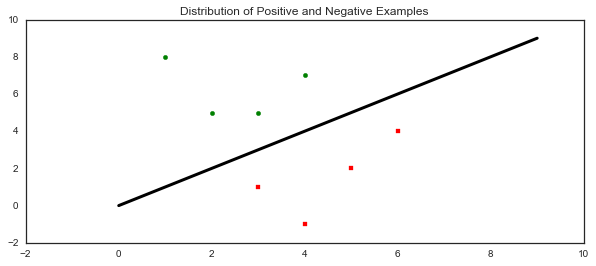

In [24]:
# Create some sample data 
X = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0])

positive = np.array([X[i] for i in range(len(X)) if y[i] == 1])
negative = np.array([X[i] for i in range(len(X)) if y[i] != 1])

# and the decisson boundary let us simply take the range of 0-10 , the data is distributed in such way
line_x = range(10)
line_y = line_x
# Let us visualize postive and negative examples 
with sns.axes_style('white'):
    plt.figure(figsize=(10,4))
    plt.scatter(positive[:,0], positive[:,1], marker= 'o', color= 'green' )
    plt.scatter(negative[:,0], negative[:,1], marker= 's', color= 'red' )
    plt.title('Distribution of Positive and Negative Examples')
    plt.plot(line_x, line_y, linewidth=3, color= 'black')

However this is just a simple classifier we just build based on line_x and line_y as the decission boundary, in real scenario the task of the algorithm is to accurately predict the decisson boundary for the data

### 2. Building a Logistic Regression Classifier. 
Lets build a sample Logistic regresson classifier, Despite the word regression being present in the name, logistic regression is actually used for classification purposes. Given a set of datapoints, our goal is to build a model that can draw linear boundaries between our classes.

In [25]:
# Lets create some data (again)
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])
# here we have three classifiers , 0,1, 2 
classifier = LogisticRegression(solver='liblinear', C=100)
#The solver parameter specifies the type of solver that the algorithm will use to solve the system of equations. The C parameter controls the regularization strength 
classifier.fit(X, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
def plot_classifier(classifier, X, y):
    # define ranges to plot the figure 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    
    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid 
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)
    
    # Plot the output using a colored plot 
    plt.figure()

    # choose a color scheme 
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.Set2)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

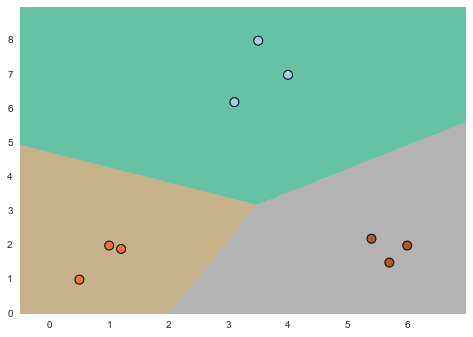

In [27]:
plot_classifier(classifier, X, y)

### 3. Building a Naive Bayes classifier
A Naive Bayes classifier is a supervised learning classifier that uses Bayes' theorem to build the model. Let's go ahead and build a Naïve Bayes classifier.

In [28]:
# Libraries imported already

In [29]:
# Load the data
input_file = 'data_multivar.txt'
X = []
y = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1]) 

X = np.array(X)
y = np.array(y)

In [30]:
# Fit the data into classifier
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)

In [31]:
print 'Accuracy of Classifier', 100.0 * ( y == y_pred).sum()/X.shape[0]

Accuracy of Classifier 99.5


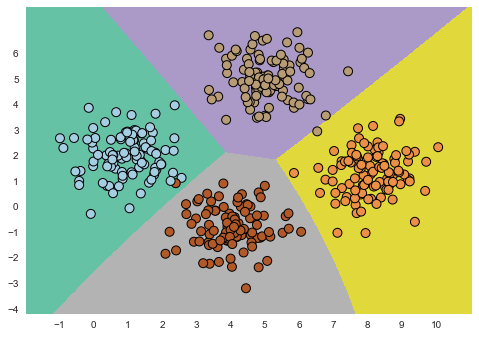

In [32]:
plot_classifier(classifier_gaussiannb, X, y)

In [33]:
# we can observe that this method does not give us linear boundaries but they are little curved 

### 4. Splitting the dataset into test and train.
We already used this method, But lets explore it more this time. 

In [39]:
# we have imported the method test_train_split already so lets start to split the train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 5)
# the data is split into 25% of test data and the rest as training data

# now lets train the classifer 
classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train)

# Predict the values for X_test and see the accuracy 
y_pred_test = classifier_gaussiannb_new.predict(X_test)
y_pred = classifier_gaussiannb_new.predict(X_train)
print 'Accuracy on train data' , 100.0 * (y_pred == y_train).sum() / X.shape[0] , '%'
print 'Accuracy on test data' , 100.0 * (y_pred_test == y_test).sum() / X.shape[0] , '%'

Accuracy on train data 75.0 %
Accuracy on test data 24.5 %


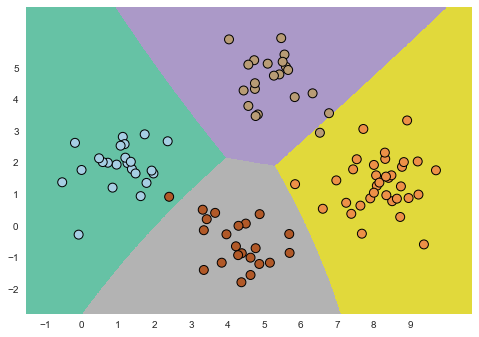

In [38]:
# The accuracy on thes test data is not soo good but still .. 
# Let us plot the classifier
plot_classifier(classifier_gaussiannb_new, X_test, y_test)

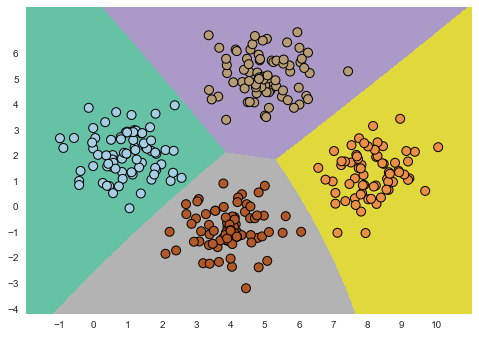

In [40]:
plot_classifier(classifier_gaussiannb, X_train, y_train)

### 4. Evaluating The Accuracy Using CrossValidation.
The cross-validation is an important concept in machine learning. In the previous recipe, we split the data into training and testing datasets. However, in order to make it more robust, we need to repeat this process with different subsets.

 If we just fine-tune it for a particular subset, we may end up overfitting the model. Overfitting refers to a situation where we fine-tune a model too much to a dataset and it fails to perform well on unknown data. 

We usually care about three things: precision, recall, and F1 score. We can get the required performance metric using the parameter scoring. 
- Precision refers to the number of items that are correctly classified as a percentage of the overall number of items in the list. 
- Recall refers to the number of items that are retrieved as a percentage of the overall number of items in the training list.

$ \text{precission} = \frac{\text{number of correct identifications}}{\text{total number of identifications}}$ <br><br><br>
$ \text{recall} = \frac{\text{number of interesting items in dataset}}{\text{total number of items retrieved correctly}}$

A good machine learning model needs to have good precision and good recall simultaneously. It's easy to get one of them to 100%, but the other metric suffers! We need to keep both the metrics high at the same time. To quantify this, we use an F1 score, which is a combination of precision and recall. This is actually the harmonic mean of precision and recall

$ \text{F1 Score } = \frac{2 * \text{ precission } * \text{ recall } } {\text{ precission } + \text{ recall }} $

In [53]:
# Now let us see how to perfrom cross validation
# Let us define it as function for reuse
def get_metrics(X,y, model):
    num_validations = 5
    # Accuracy
    accuracy = cross_validation.cross_val_score(model, X, y, scoring='accuracy', cv=num_validations)
    print 'Accuracy =' , accuracy.mean(), '%'
    
    # F1 Score
    f1 = cross_validation.cross_val_score(model, X, y, scoring='f1_weighted', cv=num_validations)
    print 'F1 Score =' , f1.mean() , '%'
    
    # precission
    precision = cross_validation.cross_val_score(model, X, y, scoring='precision_weighted', cv=num_validations)
    print 'Precision =' , precision.mean() , '%'
    
    # recall
    recall = cross_validation.cross_val_score(model, X, y, scoring='recall_weighted', cv=num_validations)
    print 'Recall =' , recall.mean() , '%'   
    
    

In [54]:
get_metrics(X, y, classifier_gaussiannb)

Accuracy = 0.995 %
F1 Score = 0.994996873046 %
Precision = 0.995238095238 %
Recall = 0.995 %


### 5. Visualizing the Confusion Matrix.
A confusion matrix is a table that we use to understand the performance of a classification model. This helps us understand how we classify testing data into different classes. When we want to fine-tune our algorithms, we need to understand how the data gets misclassified before we make these changes. Some classes are worse than others, and the confusion matrix will help us understand this.

In [57]:
# We have already imported confusion_matrix method from metrics of sklearn
y_pred = classifier_gaussiannb.predict(X) # Just redoing
confusionMatrix = confusion_matrix(y, y_pred)

In [59]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat,n):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Paired)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(n)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

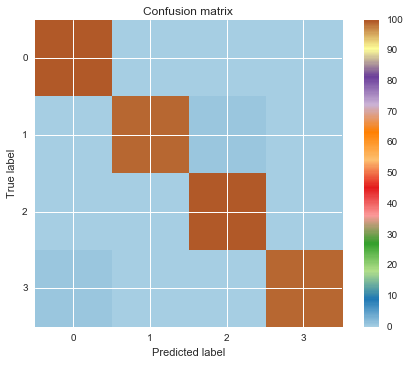

In [62]:
plot_confusion_matrix(confusionMatrix,4)

Ee want the diagnol too be strong , as this is what we are predicting from the model and all the other elements in non-diagnol need to be close to blue(According to the color bar)

### 6. Extracting classification report
We directly have a function to calculate all required metrics for us and that is metrics.classification report.

In [64]:
# lets see how it works , classification_reports is already imported 
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3'] 
print(classification_report(y, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class-0       0.99      1.00      1.00       100
    Class-1       1.00      0.99      0.99       100
    Class-2       0.99      1.00      1.00       100
    Class-3       1.00      0.99      0.99       100

avg / total       1.00      0.99      0.99       400

